# [Public Policy 275] Spatial Data and Analysis, Fall 2022

# Lab 2: Distance (Suggested solutions)

* University of California, Berkeley
* Instructor: Solomon Hsiang
* GSIs: Simon Greenhill and Hikari Murayama

**About This Lab**
* Due Date: Sep 6, 2022, 11:59 pm (submit on bCourses)
* You may talk with other students about the lab, but each student is responsible for doing all exercises in the lab themselves and turning in their own write up. We will be checking code for evidence of copying and pasting.
* When you are done with the lab, please restart the kernel and run all the codes one more time (press the ">>" button), so that the grader will see a clean notebook. Don't forget to save! Please submit this lab to bCourses as `YOURCAL1ID.ipynb`. This will facilitate anonymous grading.
* This lab requires that you download the following files and place them in the same directory as this jupyter notebook:
    * `Lab2_houses.p`
    * `Lab2_mountain.p`

## Objectives
By the end of this lab, you will be able to
1. Find and read documentation
2. Read and write files
3. Write for loops and functions
4. Plot pretty maps in Python

In [1]:
# TODO: IMPORT MODULES HERE
# it is good practice to import all the modules at the beginning of your code.
# please import all the modules you need to answer the questions below here.

# this specifies font type in matplotlib
# so that it can be properly parsed by Adobe Illustrater
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt

# the following is jupyter notebook magic
# this changes matplotlib setting so that figures show up in the notebook
%matplotlib inline

import pickle

import numpy as np

## 1. Assigning Families to Schools Using Distance
In this problem, you have to determine which families should send their children to which school by calculating which school is closest to each family's home (we want to minimize travel time). You will be given data on household locations and data on school locations.

## 1.1. Notation

Before we get started, we are going to need to change how we keep track of locations in our data sets. Consider the example that we used in the last lab assignment. Recall that in this data set, each house had two variables that described its location, one for the house's position in the x-direction and one for the y-direction. This means that we needed six variables to describe the locations of three houses. Because we are in a two-dimensional system, we know that we will always need at least six *numbers* to describe the locations of all three houses, but if we organize these six numbers differently (in terms of how we store them in Python) we can make our lives much easier, from a programming standpoint. In most data sets that describe many individual objects (e.g., houses), there is a single vector that describes *all* the x locations for multiple objects and a single vector that describes all the y locations for those same objects. Within this vector we keep track of which object (house) is associated with which element of the vector by using the index of the element to uniquely identify the object. In this small data set of houses, we would do this by combining the x and y locations into vectors

$$\overrightarrow{x} = \left[ \begin{array}{c} house0\_x \\ house1\_x \\ house2\_x  \end{array} \right]~, \quad \overrightarrow{y} = \left[ \begin{array}{c} house0\_y \\ house1\_y \\ house2\_y  \end{array} \right]$$

which simplifies many programming tasks because now we only have two variables to keep track of ($\overrightarrow{x}$ and $\overrightarrow{y}$) rather than six. If we want to know the x-location of house0, we just examine the first element of $\overrightarrow{x}$, which in Python would be `x[0]`.

### 1.1.1. In Python, construct $\overrightarrow{x}$ and $\overrightarrow{y}$ (let's call them `houses_x` and `houses_y`) using the data generated by the following cell. What is the command you used to do this?**

In [68]:
house0_x = 2
house0_y = 3
house1_x = 5
house1_y = 5
house2_x = 7
house2_y = 1
school_x = 4
school_y = 4

In [69]:
# TODO: WRITE YOUR CODE HERE
houses_x = [house0_x, house1_x, house2_x]
houses_y = [house0_y, house1_y, house2_y]

### 1.1.2. Plot the map.

Now plot all three houses on a map (like last week) using the single command `plt.plot(houses_x, houses_y, '+')`. That's easier than calling the plot command three times, right? `plt.plot()`, as well as many other commands, expect that you will store data this way: in long vectors (more precisely, in numpy arrays or lists) that describe the x and y positions of a sequence of points.
Note: for this to work, you will need to have imported `matplotlib.pyplot` in the standard way, using `import matplotlib.pyplot as plt`. Make sure you include this in the first cell above.

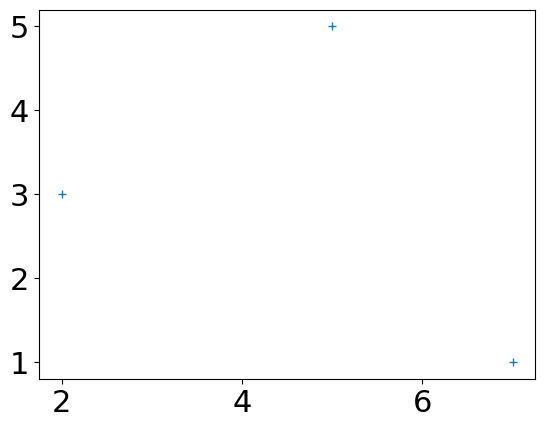

In [70]:
# TODO: WRITE YOUR CODES HERE
# TODO: WRITE YOUR CODES HERE
plt.plot(houses_x, houses_y, '+')
plt.show()

What happens if you just type `plt.plot(houses_x, houses_y)` without specifying a marker symbol?

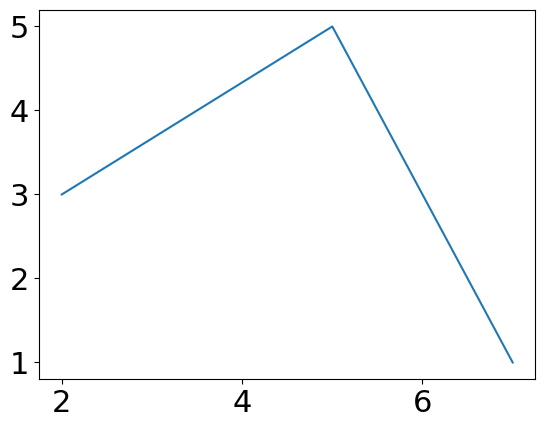

In [71]:
# TODO: WRITE YOUR CODES HERE
plt.plot(houses_x, houses_y)
plt.show()

To learn why, find and read the documentation of `plt.plot()`. 

In [72]:
# run this cell and watch what happens
# you should have imported matplotlib.pyplot as plt
?plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

Nice, isn't it? What you are reading is called a "docstring". If you can't remember the details of a command, doing this will bring up the docstrings quickly, and remind you of the inputs and outputs of the function. Some libraries have examples in their docstrings, which can be very helpful. If the docstrings are not detailed enough, Google the function names and you will see many examples on various platforms, as Python is widely used. (As these labs progress, I will expect that you become increasingly comfortable with reading documentation and so will gradually stop explaining how individual commands/functions are used.)

## 1.2. Plotting a Map of the Somewhere School District

Before we get started, let's first load a dataset in Python. In Python, the working directory (or the directory that Python is in right now) is the place where you launched Python. In Jupyter Notebook, the directory is wherever the jupyter notebook file is. If you run Python from Terminal, then the directory is the directory that you are in when you typed `python` or `python script.py`. Place the file `Lab2_houses.p` in the same directory as this jupyter notebook, and do the following to load the dataset.

```python
# pickle is a module for saving and loading Python objects
import pickle
# the with statement opens the file, and then (silently) closes it
# 'rb' stands for 'r'eading mode and 'b'inary mode (pickle saves objects into a byte stream)
# f is called a file handle. Think of it as a pointer to the file
# it doesn't have to be f, of course, name it whatever you like
# there is a convention to name it f, though
with open('Lab2_houses.p', 'rb') as f:
    # we load the file by calling pickle.load()
    # and then assign it to d, which is a short name that we gave to this dict
    d = pickle.load(f)
    # here (at the end of the with statement), python silently closed the file
    # thanks python!
# we usually don't save multiple objects with pickle
# when we want to do that, we save them as a dict
# so the d that you loaded is a dictionary
# people usually do the following to improve readability
houses_x = d['houses_x']
houses_y = d['houses_y']
schools_x = d['schools_x']
schools_y = d['schools_y']
```

If you had placed the dataset in a folder `data/` in the current directory, its path would be `data/Lab2_houses.p`. You can also go back up - your parent folder is called `../`.

*Note: There are many ways to serialize (save) and de-serialize (load) python objects, and `pickle` is the most native library for these tasks. `pickle` is also fast, and flexible. However, you don't always want to save your files as a Python specific format (what if your collaborator uses `R`?). You also don't always want to save your files as a byte stream (what if you want to quickly view it without opening Python?). In addition, pickles are less secure than other file formats---you should never open a pickle from an unknown or untrusted source. (See [here](https://medium.com/ochrona/python-pickle-is-notoriously-insecure-d6651f1974c9) if you're curious for more details.) It is very common for people to save python objects to other formats (e.g., `.csv`, `.json`) for these reasons. However, it is often good practice to save intermediate outputs with pickle.*

*Note: To save a pickle object, change the `'rb'` argument to `'wb'`, and change `d = pickle.load(f)` to `pickle.dump(d, f)`.*

This data set contains the x and y coordinates of 40 houses in the town of Somewhere and the x and y coordinates of the 3 schools in the Somewhere School District.

Take a look at the data to make sure that you understand their structure (e.g., look at `houses_x`). For exposition, "house0" refers to the first house in vector of house locations and "school0" refers to the first school in the vector of school locations. Plot a map of the town where each house is a green square and each school is a red asterisk (star). Read documentation to figure out how to access these symbols.

Make your map presentable by adding a title (`plt.title('Somewhere')`) and a legend (`plt.legend(['house', 'school'])`). This command tells Python that the first plotting command you used described houses and the second command you called plotted schools. But if you plotted these features of the map in the reverse order, you'll have to reverse the order of the labels.

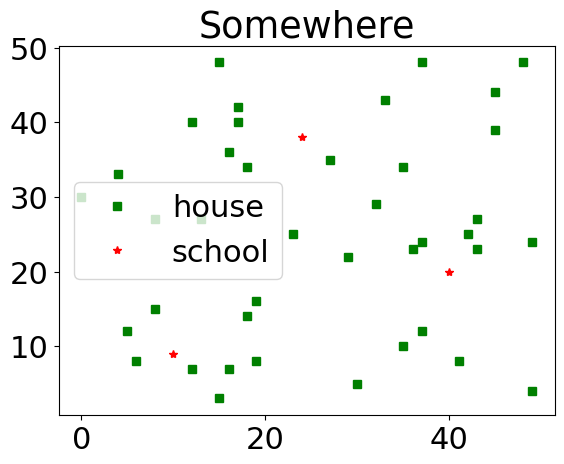

In [73]:
# TODO: PLOT YOUR MAP HERE
# TODO: PLOT YOUR MAP HERE
with open('Lab2_houses.p', 'rb') as f:
    d = pickle.load(f)

houses_x = d['houses_x']
houses_y = d['houses_y']
schools_x = d['schools_x']
schools_y = d['schools_y']
plt.plot(houses_x, houses_y, 'gs')
plt.plot(schools_x, schools_y, 'r*')
plt.title('Somewhere')
plt.legend(['house', 'school'])
plt.show()

Now your task is to figure out which household should be assigned to which school. I'll walk you through this.

## 1.3. Compute the distance from house0 to school0 (assume 1 unit in the x or y dimension is 1 km). 
Report the distance and the command you used to calculate the distance. (Hint: You should be accessing the x location of house0 by typing `houses_x[0]`. $a^b$ in Python is expressed as `a ** b` and you can use `np.sqrt` for taking the square root.).

In [74]:
# TODO: WRITE YOUR CODES HERE
dist = np.sqrt((houses_x[0] - schools_x[0]) ** 2 +
               (houses_y[0] - schools_y[0]) ** 2)
print('distance from house0 to school0: {:.2f} km'.format(dist))

distance from house0 to school0: 29.73 km


## 1.4. Now we want to compute the distance of each house to school0.

But we don't want to retype the same command 40 times. So instead, we will use a for loop to go through the list of houses one by one and compute the distance to school0 for each house. A for loop assigns a specified counter variable a numerical value and then executes the commands within the loop. When it reaches the end of the loop, it goes back to the beginning and adds 1 to the value of the counter variable and then reruns the code inside the loop with that new value. It continues to do this until it reaches the maximum value for the counter specified in the code. To see how this works, run the next cell:

In [75]:
for i in range(0, 5):
    print('hello, this number is {}'.format(i))

hello, this number is 0
hello, this number is 1
hello, this number is 2
hello, this number is 3
hello, this number is 4


The first line tells Python to start the first loop with 0 and to repeat the loop 5 times (until i reaches 4). The last run of the loop will be the run with the value of 4. Python runs through the indented lines after this line. The indentation signals to Python that the indented lines are within the for loop. The single quotes inside the command `print()` tell Python that the text is a string (not a number) and so Python simply prints the string. Because i is not contained in single quotes, and i is a number, Python displays its numerical value. If i is a different object, Python would print some informative string representations of those objects.

Two ways to format strings in python are *f-strings* and the `format` method:
1. To use the `format` method, use a pair of curly brackets as a placeholder in the string (`{}` says: print the object here), and then specify the object that you want to print in `format()`. (The way that the `format()` function (more precisely, `format()` is a *method* of the string *class*) is called is a bit unusual. Type a dot directly after the string and then type `format()`. This will make more sense once we introduce the idea of object oriented programming.)
2. For f-strings, add the letter `f` before your string, and then put the arguments you want to appear as strings directly within curly brackets in your f-string.

You can use either of these methods to format strings. I prefer the f-string methods because it's easier to read and write. Run the next cell for examples.

In [76]:
x = 'a' # this is what we want to format the string with

# the format method
print('{} b c'.format(x))

# the f-string method
print(f'{x} b c')

# note that you can use both of these methods without the print statement, 
# e.g. for object assignment.

a b c
a b c


Using code that is similar in structure to the loop above, write code to count from 0 to 39 and print 'the distance between house {} and school0 is {}', and then fill in the house number and the distance for each of the 40 houses. If you use the letter i as your counter variable (like the example above), you will need to access the location of house i using `houses_x[i]` and `houses_y[i]` inside your loop. (Hint: because you are only looking at school0, you do not want the index of the `school_x[0]` to be changing inside your loop.)

In [77]:
# TODO: WRITE YOUR CODE HERE
for i in range(40):
    dist = np.sqrt((houses_x[i] - schools_x[0]) ** 2 +
                   (houses_y[i] - schools_y[0]) ** 2)
    print('the distance between house {} and school0 is {:.2f}'.format(i, dist))

the distance between house 0 and school0 is 29.73
the distance between house 1 and school0 is 2.83
the distance between house 2 and school0 is 23.02
the distance between house 3 and school0 is 20.62
the distance between house 4 and school0 is 37.59
the distance between house 5 and school0 is 41.05
the distance between house 6 and school0 is 26.25
the distance between house 7 and school0 is 31.78
the distance between house 8 and school0 is 18.25
the distance between house 9 and school0 is 54.45
the distance between house 10 and school0 is 7.81
the distance between house 11 and school0 is 18.11
the distance between house 12 and school0 is 9.43
the distance between house 13 and school0 is 30.89
the distance between house 14 and school0 is 35.36
the distance between house 15 and school0 is 25.02
the distance between house 16 and school0 is 23.26
the distance between house 17 and school0 is 11.40
the distance between house 18 and school0 is 49.50
the distance between house 19 and school0 is

## 1.5. It's neat to print the results, but we need to actually store these numbers so that we can compare distances to different schools.

To store these distances, we need to create a new vector that will hold this new information. Do

```python
dist = np.zeros((40, 3))
```

to create this new vector. Read the `np.zeros` documentation to understand why this command works. In the first row and the first column of the vector, we'll put the distance between house0 and school0. In the second row and the first column, we'll put the distance between house1 and school0, etc.

Create this vector. Then, add a command inside your for loop that assigns the distance between house i and school 0 to element `dist[i, 0]`. To do this, type something that looks similar to `dist[i, 0] = the_distance_you_calculated_for_house_i_to_school0` inside your loop. This command will replace one of the zeros in the distances vector (at the i-th row and 0-th column) with the distance that you calculated. Now when you run your codes, you should end up with a numpy array with 40x3 elements, where the 0-th column describes the distances from each house to school0. But the 1st and the 2nd columns are all zeros, because we haven't filled in distances yet.

In [78]:
# TODO: WRITE YOUR CODE HERE
dist = np.zeros((40, 3))
for i in range(40):
    dist[i, 0] = np.sqrt((houses_x[i] - schools_x[0]) ** 2 +
                         (houses_y[i] - schools_y[0]) ** 2)

## 1.6. Calculate the distances for the other two schools.

Do the same thing for school1 and school2. You can do this by adding another loop outside or inside the existing loop. You should end up with the vector `dist` which stores all the pairwise distances between houses and schools.

In [80]:
# TODO: WRITE YOUR CODES HERE
for i in range(40):
    for j in range(3):
        dist[i, j] = np.sqrt((houses_x[i] - schools_x[j]) ** 2 +
                             (houses_y[i] - schools_y[j]) ** 2)

In [81]:
dist

array([[29.73213749, 12.04159458, 12.04159458],
       [ 2.82842712, 33.24154028, 30.87069808],
       [23.02172887, 16.76305461, 11.18033989],
       [20.61552813, 13.03840481, 17.72004515],
       [37.58989226, 21.9544984 ,  7.61577311],
       [41.0487515 , 10.29563014, 24.04163056],
       [26.2488095 ,  7.21110255, 26.07680962],
       [31.78049716,  7.28010989, 30.47950131],
       [18.24828759, 15.55634919, 27.89265136],
       [54.45181356, 26.        , 29.12043956],
       [ 7.81024968, 36.138622  , 30.23243292],
       [18.11077028, 19.41648784, 32.75667871],
       [ 9.43398113, 24.73863375, 22.8035085 ],
       [30.88689042, 19.10497317,  5.        ],
       [35.35533906, 11.70469991, 14.86606875],
       [25.01999201, 30.08321791, 11.18033989],
       [23.2594067 , 25.29822128, 41.23105626],
       [11.40175425, 22.56102835, 21.37755833],
       [49.49747468, 21.84032967, 24.51530134],
       [ 6.32455532, 32.01562119, 27.29468813],
       [20.39607805, 33.54101966, 18.027

# 1.7. Choosing the closest school.

For each house we need to determine whether it's closest to school0, school1 or school2. Do this by writing another for loop. Inside of this loop, we will use `if` statements to check which school is closest to each house. An `if` statement evaluates *if* something is `True` or `False`, and if it is true then it executes a specified command. Here, for each house we will check whether the distance to school0 is shorter than the distance to school1 and school2. If it is, then we know that schooll1 is the closest and we'll assign the house to that school. Run the following codes and observe what the output looks like.

In [20]:
# TODO: MODIFY THE FOLLOWING CODE AS YOU SEE FIT
# notice that we are using j instead of i as the counter variable
# you can use any variable names you want
# it is often helpful to use descriptive variable names
# for example we could have used the variable house_number
# since the counter is counting through the house numbers
for j in range(40):
    # the following codes just draws a line
    # helping us visually separate the output for sequential iterations of the loop
    print('----------')
    print('for house {}'.format(j))
    # this if statement here actually checks two conditions, before and after the `and`
    # so the statement is only considered true
    # if both the first and second conditions are true
    if dist[j, 0] <= dist[j, 1] and dist[j, 0] <= dist[j, 2]:
        # the indented lines are the ones that are executed if the `if` statement is true
        # if the `if` statement is not True, then python simply skips these lines of codes
        print('school 0 is closest')
    if dist[j, 1] < dist[j, 0] and dist[j, 1] <= dist[j, 2]:
        print('school 1 is closest')
    if dist[j, 2] < dist[j, 0] and dist[j, 2] < dist[j, 1]:
        print('school 2 is closest')

----------
for house 0
school 1 is closest
----------
for house 1
school 0 is closest
----------
for house 2
school 2 is closest
----------
for house 3
school 1 is closest
----------
for house 4
school 2 is closest
----------
for house 5
school 1 is closest
----------
for house 6
school 1 is closest
----------
for house 7
school 1 is closest
----------
for house 8
school 1 is closest
----------
for house 9
school 1 is closest
----------
for house 10
school 0 is closest
----------
for house 11
school 0 is closest
----------
for house 12
school 0 is closest
----------
for house 13
school 2 is closest
----------
for house 14
school 1 is closest
----------
for house 15
school 2 is closest
----------
for house 16
school 0 is closest
----------
for house 17
school 0 is closest
----------
for house 18
school 1 is closest
----------
for house 19
school 0 is closest
----------
for house 20
school 2 is closest
----------
for house 21
school 1 is closest
----------
for house 22
school 0 is closes

Read your output closely, why is house0 not assigned to any schools? These sorts of special cases are usually the ones that break your code, or cause unexpected behaviors that you did not anticipate. Handle these special cases in a way that you feel is appropriate, and describe what you did.

## 1.8. Once you have a handle on how the code above works, make a map of the results by color-coding houses based on which school they are closest to.

If school0 is closest, plot the house as a blue square. If school1 is closest, plot the house as a red square. If school2 is closest, plot the house as a green square. To do this, you will want to insert a `plt.plot()` inside each if statement, adjusting the marker color for each command to reflect which school is closest. Also plot the three schools as asterisks that are these three colors (i.e., school0 = blue, etc).

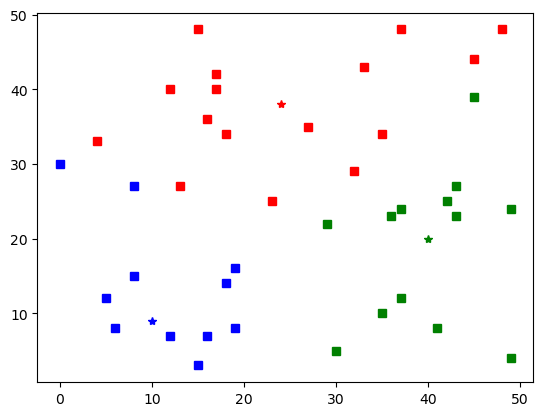

In [21]:
# TODO: PLOT YOUR MAP HERE
for j in range(40):
    if dist[j, 0] <= dist[j, 1] and dist[j, 0] <= dist[j, 2]:
        plt.plot(houses_x[j], houses_y[j], 'bs')
    if dist[j, 1] < dist[j, 0] and dist[j, 1] <= dist[j, 2]:
        plt.plot(houses_x[j], houses_y[j], 'rs')
    if dist[j, 2] < dist[j, 0] and dist[j, 2] < dist[j, 1]:
        plt.plot(houses_x[j], houses_y[j], 'gs')
plt.plot(schools_x[0], schools_y[0], 'b*')
plt.plot(schools_x[1], schools_y[1], 'r*')
plt.plot(schools_x[2], schools_y[2], 'g*')
plt.show()

# 2. Climbing a Mountain
In this exercise you will examine the path and velocity of a mountain climber as she makes her way around and then up a mountain (in 3 dimensions).

## 2.1. Setup

Load the file `Lab2_mountain.p`. The variables `x`, `y`, `z` describe the position of the climber in three-dimensional space (`z` describes elevation). The variable `t` describes the time of each observation in hours. Plot a line graph of the climber's elevation over time (with time on the abscissa). Label your graph with `plt.xlabel('Time (hours)')` and `plt.ylabel('Elevation')`. Title the graph.

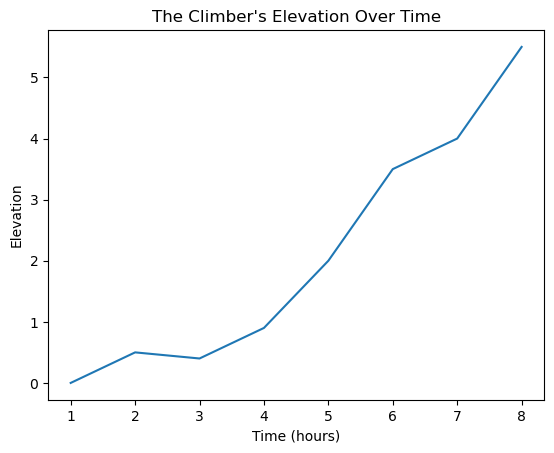

In [22]:
# TODO: WRITE YOUR CODES HERE
with open('../Lab2/Lab2_mountain.p', 'rb') as f:
    d = pickle.load(f)
x = d['x']
y = d['y']
z = d['z']
t = d['t']
plt.plot(t, z)
plt.xlabel('Time (hours)')
plt.ylabel('Elevation')
plt.title('The Climber\'s Elevation Over Time')
plt.show()

## 2.2. Plot the climber's path in 2-D

Use a line to plot the path of the climber in the X-Y plane as you would see her from above (if you were in a helicopter). Use `plt.grid()` to toggle the background gridlines on. Label the axes and title the graph.

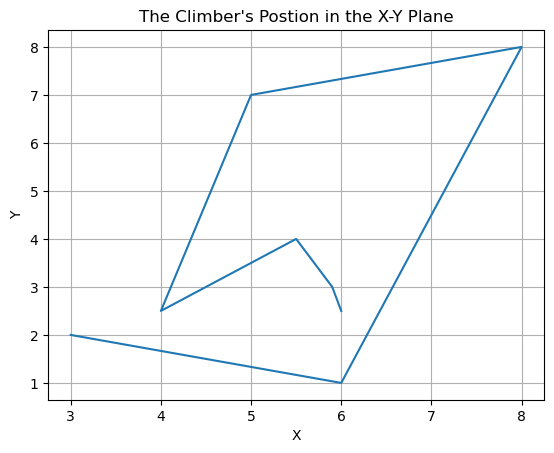

In [23]:
# TODO: WRITE YOUR CODES HERE
plt.plot(x, y)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The Climber\'s Postion in the X-Y Plane')
plt.show()

## 2.3 Plot the climber's path in 3-D

Let's make a 3-dimensional plot of the climber's path. I'll help you get started by setting up the 3D axes. Follow the commented instructions. Title the graph.

*[optional] You can set the matplotlib figures in your notebook to be interactive by doing `%matplotlib notebook`. This is called a jupyter notebook magic command (this is not in python). With this interactive setting, you can rotate your 3D figures, and view it from different angles.*

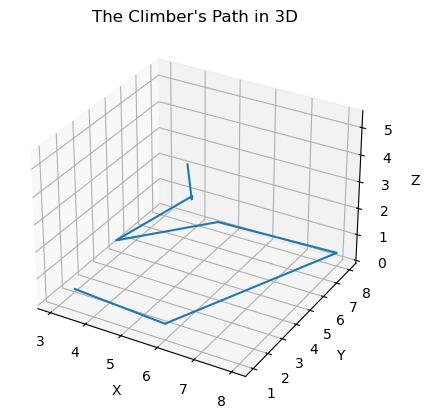

In [24]:
import matplotlib.pyplot as plt
# to plot 3D figures, do the following
# Axes3D import has side effects
# it enables the option projection='3d'
from mpl_toolkits.mplot3d import Axes3D

# this will be different from how we have been plotting figures
# and this is considered more Pythonic
# in the sense that we are now explicitly creating figure objects
# which we name `fig` (this is convention)
fig = plt.figure()
# a matplotlib plot can consist of many subplots
# for whatever reason, people chose to call them `ax`
# (this doesn't make any sense, but please follow the convention)
# `ax`es are really just subplots
# in the following line of code, we add a subplot to fig, the main plot
# 1, 1, 1 means: 1x1 grid, first subplot
# so you can imagine that 2, 3, 4 would mean: 2x3 grid, 4th subplot
# projection='3d' sets the figure to have 3D axes
ax = fig.add_subplot(1, 1, 1, projection='3d')
# now that the subplot is set up
# you can plot a line by calling `ax.plot3D()`
# remember that now, when you want to set axis labels, titles, etc.
# you would do `ax.set_title()`, `ax.set_xlabel()`
# because you are setting up these for the subplot `ax`
# and you need to tell python that

# TODO: WRITE YOUR CODES HERE
ax.plot3D(x, y, z)
ax.set_title('The Climber\'s Path in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 2.4 Plot the climber's path in 3-D as a bar chart

Draw the sequence of the positions again with `ax.bar3d()` (the steps will be similar to 2.3).

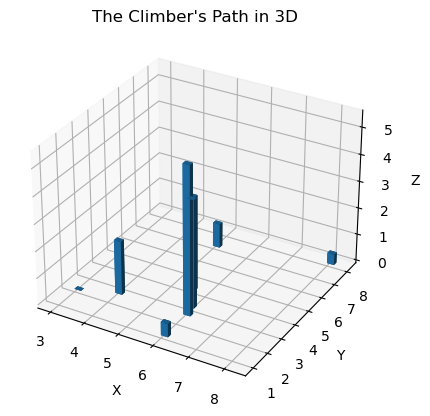

In [25]:
# TODO: WRITE YOUR CODE HERE
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.bar3d(x, y, np.zeros_like(x), 0.2, 0.2, z)
ax.set_title('The Climber\'s Path in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 2.5 Save a figure

It's sometimes a nice idea to export your figure output from your script as you work on it so that if you change something, it automatically saves the new output (so you don't have an outdated figure floating around somewhere on your computer). Create a subfolder in your directory for Lab2 called `problem2`. Then, export the figure to `problem2/`. You tell matplotlib what format to save in by specifying the suffix to your file (e.g., `.jpg` or `.pdf`). JPEG images are not the best image format for many contexts (they have pixels, so you can't zoom in too far) but they are nice for labs (and other applications) because they aren't huge files and can be embedded in almost anything. If you want to save a high quality image, e.g., in a vector format that can be zoomed into infinitely, you can always export as a PDF, PNG, or SVG. Save an image as a PDF if you would want to manipulate it in Adobe Illustrator later.

Create a composite 3D graph that shows both the path of the climber in red overlaid on the bar plot in blue. Add a title and label all three axes of your graph. Save it as a pdf. (Hint: use `ax.set_zlabel()` and `fig.savefig()`.)

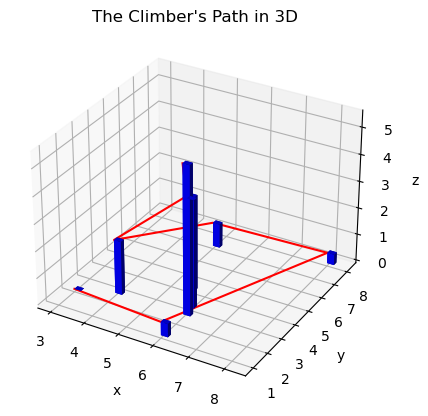

In [27]:
# TODO: WRITE YOUR CODES HERE
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(x, y, z, 'r')
ax.bar3d(x, y, np.zeros_like(x), 0.2, 0.2, z, 'b')
ax.set_title('The Climber\'s Path in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.savefig('left.pdf')

## 2.6. Plot the climber's speed

Make a plot of the speed of the climber over time (you should plot speed `s` against `T=1,2,3,...,7`; e.g., for `T=1`, calculate the climber's average speed from `t=1` to `t=2`). Label and title the plot. Is the climber getting faster or slower as she makes her way up the mountain? Save your plot as a PDF.

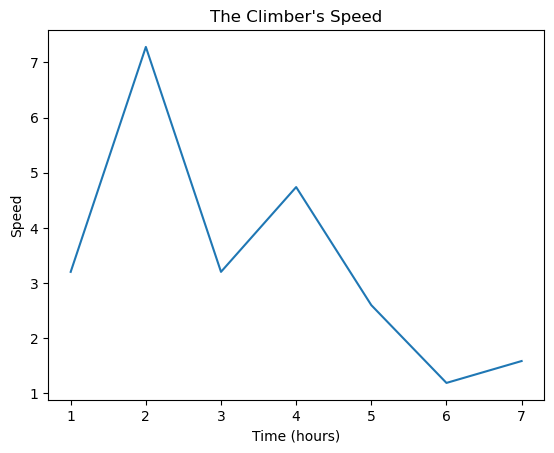

In [28]:
# TODO: WRITE YOUR CODES HERE
s = np.zeros(7)
for i in range(7):
    s[i] = np.sqrt((x[i + 1] - x[i]) ** 2 +
                   (y[i + 1] - y[i]) ** 2 +
                   (z[i + 1] - z[i]) ** 2)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t[0:-1], s)
ax.set_title('The Climber\'s Speed')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Speed')
fig.savefig('right.pdf')

# 2.7 Fine-tune your figure in Adobe Illustrator or Matplotlib

In this exercise, we want you to produce a publication-quality version of some of the figures you've produced above. You can do this in Adobe Illustrator or in Matplotlib.

If you're using Adobe Illustrator, first save the two figures you already made as PDFs. Storing your image this way makes it a vector image, which you can easily manipulate in Illustrator. Open the two files in Illustrator, and create a new figure with two panels, panel (a) with the 3D plot and panel (b) next to it with the graph of the climber's speed over time. Make the colors match across the two figures using the "eyedropper" tool, rearrange the axis labels on the 3D plot to be parallel to their respective axes, label the panels "a" and "b", and make any other changes you think improve the visual appeal of the joint figure.

If you're using Matplotlib, re-plot the two figures as subplots in a two-panel figure. Make sure the colors match across the two figures, the labels are parallel, and label the panels "a" and "b". Make any other changes you think improve the visual appeal of the joint figure. Some things you might consider is increasing the DPI (dots per inch) when you save the figure and constraining the amount of whitespace in the saved figure, either by applying a "tight layout" or by modifying the defaults for `bbox_inches` and `pad_inches`.. Check out the documentation for `plt.savefig` and `plt.tight_layout`. For more, check out Matplotlib's ["The Lifecycle of a Plot" tutorial](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html?highlight=save).

Save the resulting image as `mountain.png` and place it in the same directory as this jupyter notebook. The following cell will read it and render it in this notebook. (Do not try inserting the image in Markdown - that will only insert a link in the notebook, not the actual image.)

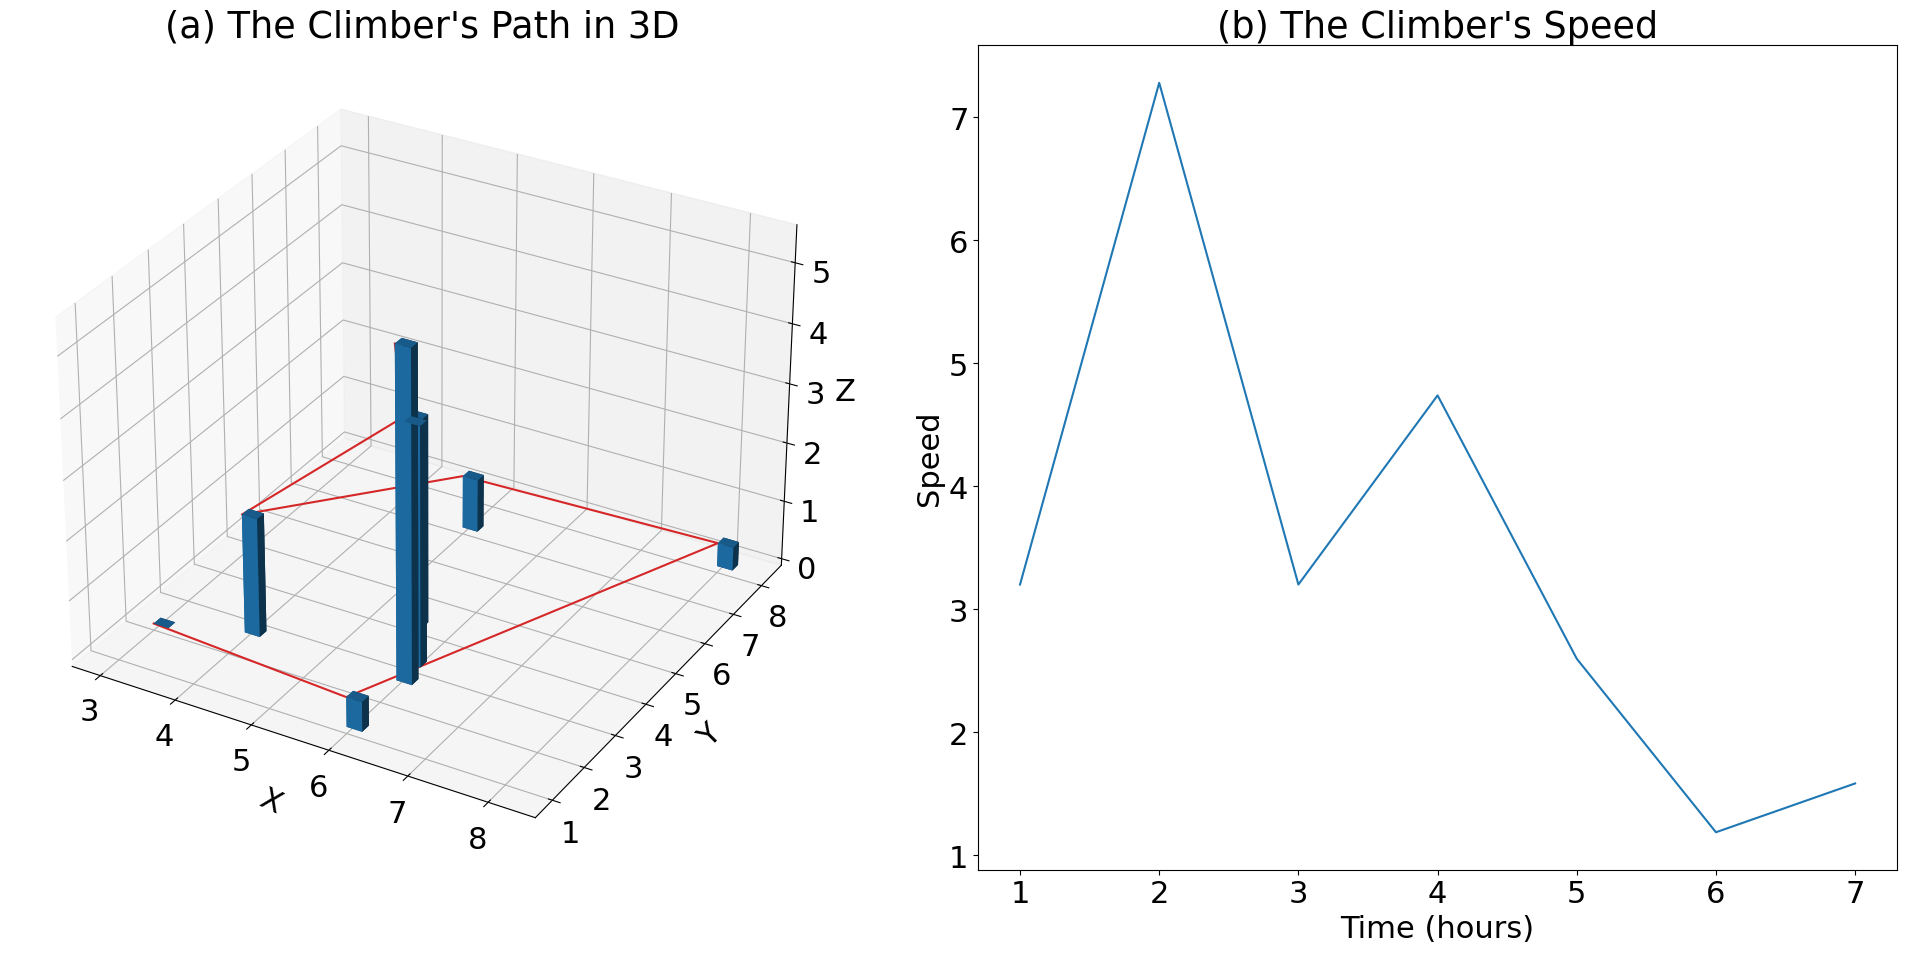

In [60]:
# increase the default font size
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.zaxis.set_rotate_label(False) # To disable automatic label rotation
ax.plot3D(x, y, z, color='tab:red')
ax.bar3d(x, y, np.zeros_like(x), 0.2, 0.2, z, color='tab:blue')
ax.set_title('(a) The Climber\'s Path in 3D')
# set labels and make them parallel to the axes. 
# We control this with the `rotation` argument.
# The `labelpad` argument controls spacing between the axis label and the axis.
ax.set_ylabel('Y', rotation=45, labelpad=10)
ax.set_xlabel('X', rotation=-25, labelpad=10)
ax.set_zlabel('Z')

s = np.zeros(7)
for i in range(7):
    s[i] = np.sqrt((x[i + 1] - x[i]) ** 2 +
                   (y[i + 1] - y[i]) ** 2 +
                   (z[i + 1] - z[i]) ** 2)
ax = fig.add_subplot(1, 2, 2)
ax.plot(t[0:-1], s, color='tab:blue') # note that color matches the above
ax.set_title('(b) The Climber\'s Speed')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Speed')

plt.tight_layout()

plt.savefig('mountain.png', dpi=600)

plt.show()

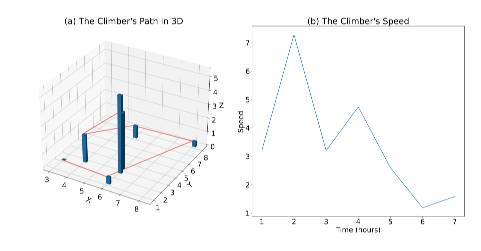

In [61]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
image = imread('mountain.png')
plt.figure(figsize=(6, 3))
plt.imshow(image)
plt.axis('off')
plt.show()

## 2.8 Calculate distance travelled

What is the total (one-way) distance that the climber travels (along her path)? (Hint: you can write a for loop to do this.) Be sure to account for changes in the climber's elevation.

# 3. Functions and List Comprehensions

## Introducing Functions

So far we have focused on code that goes down a sequence of commands as if we typed them in that order at the command line. But sometimes we find ourselves typing similar things, doing the same kind of calculation over and over again. In these cases, it's useful to write a function so we don't have to keep retyping the same sequence of commands and debugging it each time. We can write a function that solves the same problem in a "general case" and then we don't have to think very hard each time we want to do a related operation, we just call the function. Writing functions can also help us avoid mistakes and help us debug code faster, since once we make sure the function works then we don't have to debug it each time we call it (so long as we debug it well the first time).

Python already has many functions that we have been using all along; however, you can design new functions that can be called in the same way but have new functionality. Here's how a function can be defined in Python:

```python
def add(a, b):
    """This function performs addition.
    
    Args:
        a, b (float): numbers to be added.

    Returns:
        float: the sum of a and b
    """
    return a + b
```

Note: When you run the `def` block, the function is defined but not executed (it's like you purchased a blender, but didn't put in anything yet). You have to then call it with inputs to get the outputs (you have to then put in fruits and milk to get your smoothie).

The first line tells Python that this is a function, that it takes in two arguments. Arguments are assigned to the named local variables in a function body. These variable names are only used within the function, so if you were to type `a` elsewhere hoping to use that variable, you won't find it. Once the function is called and finishes execution, all of the variables that are used in the function are erased and it only outputs the objects that you specify it must output (after `return`). Remember that once anything is `return`ed, you would exit the function (all the following commands won't be executed).

The next several lines of codes are called "docstrings". (Yes, those are the docstrings that you were reading.) Docstrings are incredibly important. They tell the users of this function (most likely your future self) what this function does, and specify, e.g., the input/output of the function. Once you have created the function, try typing `?add` and you should see how this works. You may want to use a function several years from now and it's much easier to just read a clear documentation to remember how the code works rather than to read the codes itself (I regularly use functions that I wrote five years ago and am always referring to my own documentation).

The block between the docstring and `return` is what the function is actually doing. In this simple case, it is adding two variables. You can imagine changing some codes here to make it more useful. Following the descriptions in the docstring, complete this function.

In [62]:
def calculate_distance(x0, y0, z0, x1, y1, z1):
    """This function calculates the distance between (x0, y0, z0) and (x1, y1, z1).
    
    Args:
        x0, y0, z0, x1, y1, z1 (numpy.float): the x, y, z positions of two points.
        
    Returns:
        dist (numpy.float): the distance between (x0, y0, z0) and (x1, y1, z1).
    """
    # TODO: COMPLETE THIS FUNCTION
    return np.sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2 + (z0 - z1) ** 2)

**Testing Your Functions**

**You should always, always, always test your functions.** Test your functions with simple, intuitive tests. For example, run the following cells and convince yourself that your function is behaving as expected.

One nice command to use is `assert`, it asserts that a certain condition is true, and if it is not true, it will raise an error. This is commonly used to verify that given certain inputs, funtions are outputting the correct values.

In [63]:
assert calculate_distance(0, 0, 0, 1, 0, 0) == 1

In [64]:
assert calculate_distance(0, 0, 5, 3, 4, 5) == 5

In [65]:
assert calculate_distance(0, -3, -4, 0, 0, 0) == 5

## List Comprehension
List comprehensions are a compact, "pythonic" way to write simple loops.
A basic loop looks something like this:

```python
isum = 0
for i in range(3):
    isum = isum + 2 * i
```

You can write this in one line using a list comprehension:
```python
isum = sum([2 * i for i in range(3)])
```

Beautiful, right? List comprehension is elegant, succinct and computationally efficient. What this line of code means is that for every `i` in `range(3)` (i.e., `[0, 1, 2]`), we do something to `i` (in this case, we multiply it by 2), and then we collect all these outputs as a list, the `sum()` function then takes in this list, and outputs the summation of this list.

One thing that you may notice is that list comprehension drops useless intermediate variables (in this case, `i` is an useless intermediate variable, and it persists in your environment if you write your codes in the traditional way (with the `for` block), but is no longer in your environment if you use list comprehension.) For many reasons, list comprehension is much more efficient than traditional for loops, and they are easier to read.

# 3.1 Re-answer question 2.8 using a function and a list comprehension
Now you know about functions and list comprehensions, you can write a more elegant and efficient answer to question 2.8. Calculate the total one-way distance the climber travels along her path. Use the `calculate_distance` function you defined above inside a list comprehension to obtain a list of the distances between each point. Then sum this distance to get the total. 

In [66]:
# USING THIS FUNCTION, WRITE CODE HERE TO ANSWER THE QUESTION 2.8
# What is the total (one-way) distance that the climber travels (along her path)? 
# Be sure to account for changes in the climber's elevation.

# TRY USING LIST COMPREHENSION
dist_sum = sum([calculate_distance(x[i], y[i], z[i],
                                   x[i + 1], y[i + 1], z[i + 1])
                for i in range(x.shape[0] - 1)])
print('Distance travelled: {:.2f}'.format(dist_sum))

Distance travelled: 23.79


## Congratulations!
You've finished this lab!

* **Please list everyone you worked on this assignment with outside of public Piazza discussions.**